In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures #experimental
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn import svm
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
import random
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error
from sklearn import tree
import seaborn as sns
sns.set()

In [2]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=11):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 11.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='center', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig



In [10]:
# df = pd.read_csv('tryndelete.csv')
# df = pd.read_csv('./MAST_data_Ninad_features.csv')
df = pd.read_csv('./HT_MTG_tryndelete.csv')
df

,pitch_hist_cos_10,pitch_hist_cos_20,pitch_hist_cos_50,pitch_hist_cos_100,file_name,grade
0,0.278161,0.250352,0.066774,0.012970,./submissions/49_recording-0-2019-01-07T06-17-...,4
1,0.336378,0.364360,0.190650,0.017387,./submissions/53_recording-0-2019-01-11T06-21-...,3
2,0.286655,0.209446,0.024626,0.005960,./submissions/54_recording-0-2019-01-11T06-38-...,4
3,0.424678,0.360138,0.395288,0.062696,./submissions/60_recording-0-2019-01-15T17-13-...,3
4,0.965343,0.956605,0.893077,0.782525,./submissions/61_recording-0-2019-01-15T17-17-...,1
5,0.578449,0.564701,0.503493,0.499398,./submissions/97_recording-0-2019-02-15T13-21-...,1
6,0.706613,0.670973,0.505139,0.007048,./submissions/98_recording-0-2019-02-21T10-40-...,4
7,0.341597,0.311628,0.116999,0.002612,./submissions/103_recording-0-2019-02-25T23-00...,4
8,0.338746,0.270734,0.023732,0.001910,./submissions/105_recording-0-2019-02-25T23-07...,4
9,0.567035,0.518063,0.340312,0.012766,./submissions/109_recording-0-2019-02-27T14-03...,4


In [11]:
# df_features = pd.read_csv('features_sargam.csv').drop('grade', axis=1)
# df_grade = pd.read_csv('report_sargam.csv',header=None)
# df_grade.columns = ['sound_id', 'grade']

In [12]:
# df=pd.merge(df_features, df_grade, how='inner',on='sound_id')

In [13]:
df.head()

,pitch_hist_cos_10,pitch_hist_cos_20,pitch_hist_cos_50,pitch_hist_cos_100,file_name,grade
0,0.278161,0.250352,0.066774,0.012970,./submissions/49_recording-0-2019-01-07T06-17-...,4
1,0.336378,0.364360,0.190650,0.017387,./submissions/53_recording-0-2019-01-11T06-21-...,3
2,0.286655,0.209446,0.024626,0.005960,./submissions/54_recording-0-2019-01-11T06-38-...,4
3,0.424678,0.360138,0.395288,0.062696,./submissions/60_recording-0-2019-01-15T17-13-...,3
4,0.965343,0.956605,0.893077,0.782525,./submissions/61_recording-0-2019-01-15T17-17-...,1


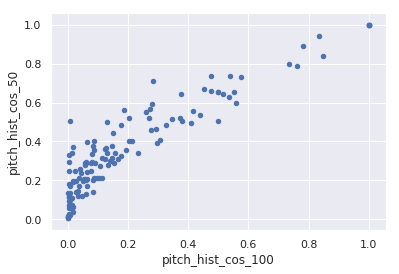

In [14]:
df.plot.scatter(x='pitch_hist_cos_100', y='pitch_hist_cos_50')

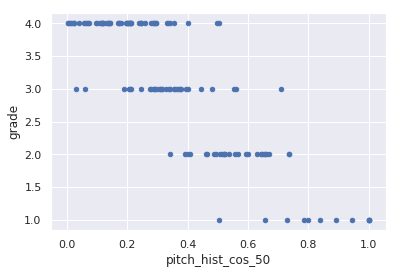

In [15]:
df.plot.scatter(x='pitch_hist_cos_50', y='grade')

In [16]:
df['grade'].value_counts()

4    59
3    33
2    27
1    12
Name: grade, dtype: int64

In [17]:
len(df)

131

In [18]:
features = ['pitch_hist_cos_10', 'pitch_hist_cos_20', 'pitch_hist_cos_50','pitch_hist_cos_100']

In [19]:
X = df[features].values

# poly = PolynomialFeatures(degree=3)
# X = poly.fit_transform(X)
# predict_ = poly.fit_transform(predict)

# clf = linear_model.LinearRegression()
# Extract classes
y = df['grade'].values

In [20]:
X.shape[0]

131

numSamples : 131
TRAIN : [ 13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30
  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48
  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66
  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102
 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120
 121 122 123 124 125 126 127 128 129 130]
TEST : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
TRAIN : [  0   1   2   3   4   5   6   7   8   9  10  11  12  26  27  28  29  30
  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48
  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66
  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102
 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120

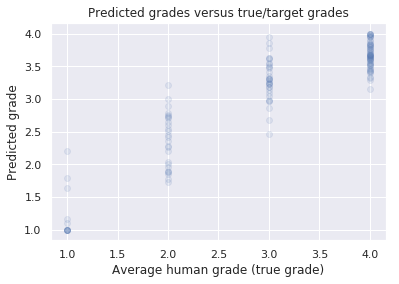

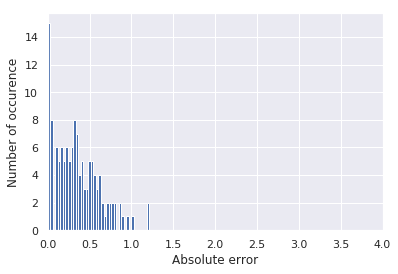

In [21]:
# Split the data into training/testing sets
# X = feature_selected.as_matrix()
# print(X)
# if len(X.shape) ==1 :
#     X = np.reshape(X, (X.shape[0], 1))
splitRatio4Test=0.10
numSamples=X.shape[0]
print('numSamples : ' + str(numSamples))
numTestSamples=round(numSamples*splitRatio4Test)

#Running repeated number of random experiments
MAE=[]
gt_array = []
pred_array = []
abs_error_per_file = np.empty(shape=[0, ])
tested_inds = []
#Run the tests and print estimation results for each file in log-file: 'resultsPerFile.csv'
for k in range(0,numSamples,numTestSamples):
    #splitting
    test_indices =list(range(k,min(k+numTestSamples,numSamples)))
    train_indices=np.delete(range(numSamples),test_indices)
    print('TRAIN : ' + str(train_indices))
    print('TEST : ' + str(test_indices))

    X_train = X[train_indices]
    X_test = X[test_indices]

    # Split the targets into training/testing sets
    Y_train = y[train_indices]
    Y_test = y[test_indices]
    tested_inds.extend(test_indices)

    # Create linear regression object
    regr = linear_model.LinearRegression()
#     regr = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
    
    # Train the model using the training sets
    regr.fit(X_train, Y_train)

    # Make predictions using the testing set
    Y_pred = regr.predict(X_test)
    #applying hard limits: 1-4 for prediction results
    minVal=np.ones(Y_pred.shape)
    maxVal=minVal*4
    Y_pred = np.maximum(Y_pred,minVal)
    Y_pred = np.minimum(Y_pred,maxVal)

    # Compute mean squared error
    MAE.append(mean_absolute_error(Y_test, Y_pred))
    gt_array.extend(Y_test)
    pred_array.extend(Y_pred)

    abs_error_per_file=np.append(abs_error_per_file,np.abs(Y_pred-Y_test))

# print('Mean absolute error for automatic grading: ',np.mean(MSE))
plt.scatter(gt_array, pred_array, marker='o', alpha=0.1)
plt.xlabel("Average human grade (true grade)")
plt.ylabel("Predicted grade")
plt.title("Predicted grades versus true/target grades")
plt.show()
# # print(np.std(np.abs(np.array(gt_array)-np.array(pred_array))))

abs_err_hist = plt.hist(abs_error_per_file,40)
plt.xlabel('Absolute error')
plt.ylabel('Number of occurence')
plt.xlim([0,4])
plt.show()

absolute_error = np.abs(np.array(gt_array)-np.array(pred_array))

In [22]:
print(len(absolute_error))
print(len(absolute_error[absolute_error < 0.5]))
print(np.mean(absolute_error), np.std(absolute_error))
print(np.where(absolute_error >= 1), len(np.where(absolute_error >= 1)[0]))

131
95
0.35210340774605614 0.26678936466005065
(array([ 5, 57, 93]),) 3


In [23]:
from joblib import dump, load

In [24]:
y_train

NameError: name 'y_train' is not defined

In [25]:
# dump(regr, 'regression.joblib')
# saved_regr = load('regression.joblib')
# saved_regr.predict([X_test[0]])[0]

In [26]:
# from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
# X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=random.randint(0,10000))
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train, y_train)

y_predict = clf.predict(X_test)
unique_classes = np.unique(list(y_test) +  list(y_predict))
class_names = [unique_classes]
clf_report = classification_report(y_test, y_predict)
cm = confusion_matrix(y_test, y_predict)


/home/ninad/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [27]:
print(cm)
print(clf_report)

[[ 0  6  0  0]
 [ 0  8  0  2]
 [ 0  2  0 19]
 [ 0  0  0 29]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
           2       0.50      0.80      0.62        10
           3       0.00      0.00      0.00        21
           4       0.58      1.00      0.73        29

    accuracy                           0.56        66
   macro avg       0.27      0.45      0.34        66
weighted avg       0.33      0.56      0.42        66



In [28]:
clf = KNeighborsClassifier(n_neighbors=7)
# clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')

# clf = tree.DecisionTreeClassifier()
# clf = svm.SVC()

clf_name = 'KNN'
print("Results for %s classifier\n\n" % clf_name)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random.randint(0,10000))
k_fold = KFold(10)
print("----------------------------------------------------")
print("10-fold validation results\n")
for k, (train, test) in enumerate(k_fold.split(X_train, y_train)):
    clf.fit(X_train[train], y_train[train])
    acc = clf.score(X_train[test], y_train[test])
    print("Fold no %d: %f accuracy." % (k+1, acc))

clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
unique_classes = np.unique(list(y_test) +  list(y_predict))
class_names = [unique_classes]
clf_report = classification_report(y_test, y_predict)
cm = confusion_matrix(y_test, y_predict)


Results for KNN classifier


----------------------------------------------------
10-fold validation results

Fold no 1: 0.909091 accuracy.
Fold no 2: 0.818182 accuracy.
Fold no 3: 0.727273 accuracy.
Fold no 4: 0.727273 accuracy.
Fold no 5: 0.700000 accuracy.
Fold no 6: 0.600000 accuracy.
Fold no 7: 0.800000 accuracy.
Fold no 8: 0.900000 accuracy.
Fold no 9: 0.600000 accuracy.
Fold no 10: 0.600000 accuracy.


In [29]:
cm

array([[ 3,  0,  0,  0],
       [ 0,  5,  1,  0],
       [ 0,  0,  3,  2],
       [ 0,  0,  1, 12]])

In [30]:
# dump(clf, 'KNN_pass_fail.joblib')

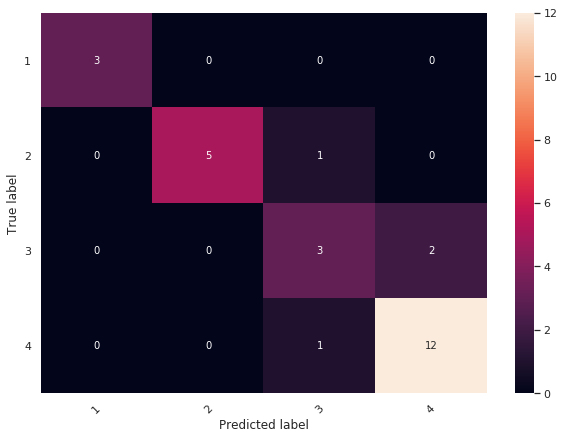

In [31]:
cmfig = print_confusion_matrix(cm, class_names)
# plt.imshow(cm, cmap='binary')
plt.show()

In [32]:
print(clf_report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      0.83      0.91         6
           3       0.60      0.60      0.60         5
           4       0.86      0.92      0.89        13

    accuracy                           0.85        27
   macro avg       0.86      0.84      0.85        27
weighted avg       0.86      0.85      0.85        27



In [ ]:
# clf.fit(X, y)

In [ ]:
# df.loc[df.grade <= 2, 'grade'] = 0
# df.loc[df.grade  >= 3, 'grade'] = 1
     

In [ ]:
# df